In [1]:
import os
import sys
ROOT = os.getenv('BONNER_ROOT_PATH')
sys.path.append(ROOT)
from tools import *
import matplotlib.colors as mcolors

PREDS_PATH = '/data/atlas/.cache/beta_predictions'
PATH_TO_BOOTSTRAP = '/home/akazemi3/Desktop/untrained_models_of_visual_cortex/model_evaluation/results/predicting_brain_data/bootstrap_data'

In [2]:
DATASET_INFO_DICT = {
    
    'naturalscenes':{
        'subjects':[i for i in range(8)],
        'regions':['ventral visual stream','midventral visual stream','early visual stream'],
        'expansion_features':[3,30,300,3000],
        'vit_features':[12,5*12, 50*12],
        'test_data_size':872
    },
    
    'majajhong':{
        'subjects':['Tito','Chabo'],
        'regions':['V4','IT'],
        'expansion_features':[3,30,300,3000,30000],
        'vit_features':[12,5*12, 50*12, 500*12],
        'test_data_size':640
    }
}


# Main Results

#### run bootstrap

In [3]:
# run bootstrap 

#dataset = 'naturalscenes'
dataset = 'majajhong'
info_dict = DATASET_INFO_DICT[dataset]


n_rows = info_dict['test_data_size']
all_sampled_indices = np.random.choice(n_rows, (1000, n_rows), replace=True) # Sample indices for all bootstraps at once

for region in info_dict['regions']:
     
    # engineered models 
    get_bootstrap_data(models= ['expansion','expansion_linear','fully_connected'],
                        features=info_dict['expansion_features'],
                        dataset=dataset, 
                        subjects=info_dict['subjects'],
                        layers = 5,
                        file_name = 'engineered',
                        region=region,
                        all_sampled_indices=all_sampled_indices)
    
    # vit models
    get_bootstrap_data(models= ['ViT'],
                        features=info_dict['vit_features'],
                        dataset=dataset, 
                        subjects=info_dict['subjects'],
                        layers = 5,
                        file_name = 'ViT',
                        region=region,
                        all_sampled_indices=all_sampled_indices)
    
    # alexnet
    get_bootstrap_data(models=['alexnet'],
                        features=[None],
                        dataset=dataset, 
                        subjects=info_dict['subjects'],
                        layers='best',
                        file_name='alexnet',
                        region=region,
                        all_sampled_indices=all_sampled_indices)

100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.56it/s]


#### loading bootstrap data

In [3]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

In [4]:
# vit data
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-vit-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_vit = pickle.load(file)
    
# expansion model and MLP data
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-engineered-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_engineered = pickle.load(file)
    
# alexnet data
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-alexnet-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_alexnet = pickle.load(file)  

In [5]:
df_engineered['features'] = df_engineered['features'].apply(lambda x: int(x)*36) # multiply by spatial dims
df_vit['features'] = df_vit['features'].apply(lambda x: int(x)*196) # multiply by spatial dims
df = pd.concat([df_engineered,df_vit]).reset_index(drop=True)

names ={'expansion':'Convolution','ViT':'Transformer','fully_connected':'Fully connected'}
palette ={'Convolution':'royalblue','Transformer':'palevioletred','Fully connected':'darkviolet'}

df['model'] = df['model'].map(names)
df['color'] = df['model'].map(palette)

df = df.dropna(subset='model').reset_index()

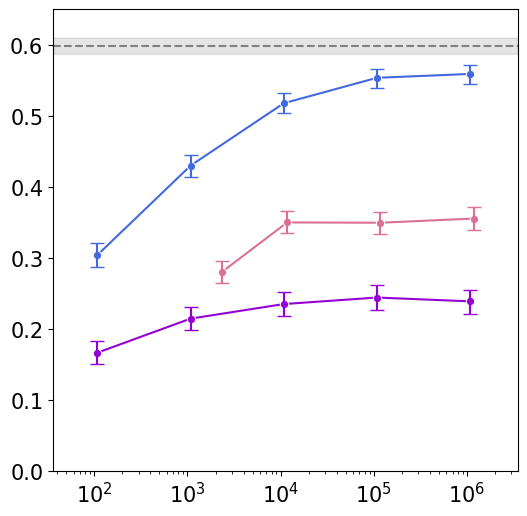

In [6]:
rcParams['figure.figsize'] = (6,6)  


# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='model', marker='o', palette = palette)
# adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])   
    
# alexnet 
plt.axhline(y=df_alexnet['score'][0], color='gray', linestyle='--', label='AlexNet')
# adding 95% confidence interval 
plt.fill_between(np.arange(df['features'].min()/3,df['features'].max()*3), 
                 df_alexnet['lower'], df_alexnet['upper'], color='gray', alpha=0.2)



plt.ylim(0,0.45) if DATASET == 'naturalscenes' else plt.ylim(0,0.65)
plt.xlabel('')
plt.ylabel('')
plt.xlim(df['features'].min()/3,df['features'].max()*3)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")        
ax1.legend(frameon=False,fontsize=12) if region == 'V4' else ax1.legend_.remove()
plt.savefig(f'figures/main_results_{DATASET}_{region}.png', dpi=200) 
plt.show()

# PCA

#### run bootstrap 

In [6]:
#dataset = 'naturalscenes'
dataset = 'majajhong'
info_dict = DATASET_INFO_DICT[dataset]


n_rows = info_dict['test_data_size']
all_sampled_indices = np.random.choice(n_rows, (1000, n_rows), replace=True) # Sample indices for all bootstraps at once

for region in info_dict['regions']:

    df_expansion = get_bootstrap_data(models= ['expansion'],
                            features=info_dict['expansion_features'],
                            principal_components=[1,10,100,1000],
                            dataset=dataset, 
                            subjects=info_dict['subjects'],
                            layers = 5,
                            file_name = 'expansion_pcs',
                            region=region,
                            all_sampled_indices=all_sampled_indices)

expansion_features=3_layers=5_dataset=majajhong_principal_components=1


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3_layers=5_dataset=majajhong_principal_components=1 V4
expansion_features=3_layers=5_dataset=majajhong_principal_components=10


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3_layers=5_dataset=majajhong_principal_components=10 V4
expansion_features=3_layers=5_dataset=majajhong_principal_components=100


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3_layers=5_dataset=majajhong_principal_components=100 V4
expansion_features=3_layers=5_dataset=majajhong_principal_components=1000


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3_layers=5_dataset=majajhong_principal_components=1000 V4
expansion_features=30_layers=5_dataset=majajhong_principal_components=1


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30_layers=5_dataset=majajhong_principal_components=1 V4
expansion_features=30_layers=5_dataset=majajhong_principal_components=10


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30_layers=5_dataset=majajhong_principal_components=10 V4
expansion_features=30_layers=5_dataset=majajhong_principal_components=100


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30_layers=5_dataset=majajhong_principal_components=100 V4
expansion_features=30_layers=5_dataset=majajhong_principal_components=1000


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30_layers=5_dataset=majajhong_principal_components=1000 V4
expansion_features=300_layers=5_dataset=majajhong_principal_components=1


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=300_layers=5_dataset=majajhong_principal_components=1 V4
expansion_features=300_layers=5_dataset=majajhong_principal_components=10


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=300_layers=5_dataset=majajhong_principal_components=10 V4
expansion_features=300_layers=5_dataset=majajhong_principal_components=100


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=300_layers=5_dataset=majajhong_principal_components=100 V4
expansion_features=300_layers=5_dataset=majajhong_principal_components=1000


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=300_layers=5_dataset=majajhong_principal_components=1000 V4
expansion_features=3000_layers=5_dataset=majajhong_principal_components=1


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3000_layers=5_dataset=majajhong_principal_components=1 V4
expansion_features=3000_layers=5_dataset=majajhong_principal_components=10


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3000_layers=5_dataset=majajhong_principal_components=10 V4
expansion_features=3000_layers=5_dataset=majajhong_principal_components=100


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3000_layers=5_dataset=majajhong_principal_components=100 V4
expansion_features=3000_layers=5_dataset=majajhong_principal_components=1000


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3000_layers=5_dataset=majajhong_principal_components=1000 V4
expansion_features=30000_layers=5_dataset=majajhong_principal_components=1


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30000_layers=5_dataset=majajhong_principal_components=1 V4
expansion_features=30000_layers=5_dataset=majajhong_principal_components=10


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30000_layers=5_dataset=majajhong_principal_components=10 V4
expansion_features=30000_layers=5_dataset=majajhong_principal_components=100


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30000_layers=5_dataset=majajhong_principal_components=100 V4
expansion_features=30000_layers=5_dataset=majajhong_principal_components=1000


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30000_layers=5_dataset=majajhong_principal_components=1000 V4
expansion_features=3_layers=5_dataset=majajhong_principal_components=1


100%|███████████████████████████████████| 2/2 [00:00<00:00,  6.13it/s]


expansion_features=3_layers=5_dataset=majajhong_principal_components=10


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.41it/s]


expansion_features=3_layers=5_dataset=majajhong_principal_components=100


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.50it/s]


expansion_features=3_layers=5_dataset=majajhong_principal_components=1000


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3_layers=5_dataset=majajhong_principal_components=1000 IT
expansion_features=30_layers=5_dataset=majajhong_principal_components=1


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.44it/s]


expansion_features=30_layers=5_dataset=majajhong_principal_components=10


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.48it/s]


expansion_features=30_layers=5_dataset=majajhong_principal_components=100


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.49it/s]


expansion_features=30_layers=5_dataset=majajhong_principal_components=1000


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.41it/s]


expansion_features=300_layers=5_dataset=majajhong_principal_components=1


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.48it/s]


expansion_features=300_layers=5_dataset=majajhong_principal_components=10


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.48it/s]


expansion_features=300_layers=5_dataset=majajhong_principal_components=100


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.30it/s]


expansion_features=300_layers=5_dataset=majajhong_principal_components=1000


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.33it/s]


expansion_features=3000_layers=5_dataset=majajhong_principal_components=1


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.41it/s]


expansion_features=3000_layers=5_dataset=majajhong_principal_components=10


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.42it/s]


expansion_features=3000_layers=5_dataset=majajhong_principal_components=100


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.47it/s]


expansion_features=3000_layers=5_dataset=majajhong_principal_components=1000


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.48it/s]


expansion_features=30000_layers=5_dataset=majajhong_principal_components=1


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.46it/s]


expansion_features=30000_layers=5_dataset=majajhong_principal_components=10


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.37it/s]


expansion_features=30000_layers=5_dataset=majajhong_principal_components=100


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.22it/s]


expansion_features=30000_layers=5_dataset=majajhong_principal_components=1000


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.46it/s]


#### load bootstrap data

In [8]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

In [33]:
#load bootstrap data

with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-engineered-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_engineered = pickle.load(file)

with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-expansion_pcs-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_pcs = pickle.load(file) 


In [35]:
df_pcs['pcs'] = df_pcs['pcs'].apply(lambda x: int(x))
df_pcs['full_model_score'] = df_pcs['features'].apply(lambda x: df_engineered[(df_engineered.model == 'expansion') & (df_engineered.features == x)].reset_index(drop=True).score[0])


names ={f'expansion_3':f'Features = {write_powers(2)}',
    f'expansion_30':f'Features = {write_powers(3)}',
    f'expansion_300':f'Features = {write_powers(4)}',
    f'expansion_3000':f'Features = {write_powers(5)}',
    f'expansion_30000':f'Features = {write_powers(6)}'}


df_pcs['model_family'] = 'Convolution'
df_pcs['model'] = df_pcs['model'] + '_' + df_pcs['features']
df_pcs['model'] = df_pcs['model'].map(names)

palette_blues = {}
blues = plt.cm.Blues([0.2, 0.4, 0.6, 0.8, 1.0])
hex_blues= [mcolors.rgb2hex(color) for color in blues]

for c, hex_color in enumerate(hex_blues):
    palette_blues[f'Features = {write_powers(c+2)}'] = hex_color

df_pcs['color'] = df_pcs['model'].map(palette_blues)

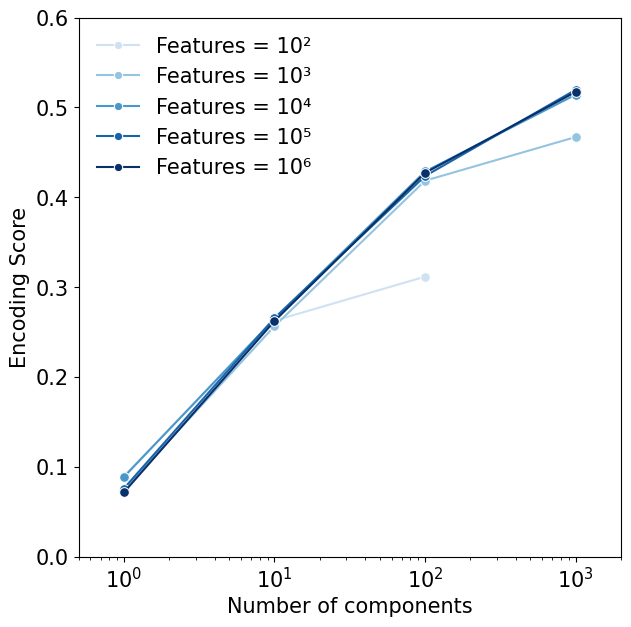

In [38]:
rcParams['figure.figsize'] = (7,7)  

ax1 = sns.lineplot(data = df_pcs, x='pcs', y='score', hue='model', dashes=False, marker='o', palette = palette_blues)
  
plt.xlabel("Number of components",size=15)
plt.ylabel('Encoding Score',size=15)
plt.xlim(df_pcs['pcs'].min()/2,df_pcs['pcs'].max()*2)
plt.ylim(0,0.6) if region == 'IT' else plt.ylim(0,0.45)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")    
ax1.legend(frameon=False,fontsize=15)
plt.setp(plt.gca().get_lines(), markersize=7)  # Change 9 to your desired marker size
plt.savefig(f'figures/principal_components_{DATASET}_{region}.png', dpi=200) 
plt.show()

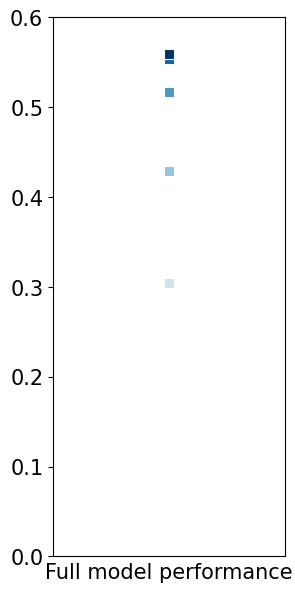

In [40]:
# main results
rcParams['figure.figsize'] = (3,7)  

ax1 = sns.lineplot(data = df_pcs, x='model_family', y='full_model_score', hue='model', dashes=False, style='model_family', marker='s', palette = palette_blues)
plt.xlabel("Full model performance",size=15)
plt.ylabel('')
plt.xlim(-10,10)
plt.ylim(0,0.6) if region == 'IT' else plt.ylim(0,0.45)
ax1.legend_.remove()    
plt.yticks(size=15)
ax1.set_xticks([])
plt.setp(plt.gca().get_lines(), markersize=7)  # Change 9 to your desired marker size
plt.savefig(f'figures/full_model_performance_pcs_{DATASET}_{region}.png', dpi=200) 
plt.show()

# Convolution linear models

#### load bootstrap data

In [66]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

In [67]:
# loading bootstrap data

with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-engineered-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_engineered = pickle.load(file)
    
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-alexnet-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_alexnet = pickle.load(file)  

In [68]:
df_engineered['features'] = df_engineered['features'].apply(lambda x: int(x)*36)

names ={'expansion':'Convolution','expansion_linear':'Convolution linear'}
df_engineered['model'] = df_engineered['model'].map(names)

palette ={'Convolution':'royalblue','Convolution linear':'orange'}
df_engineered['color'] = df_engineered['model'].map(palette)
df_engineered = df_engineered.dropna(subset='model').reset_index()

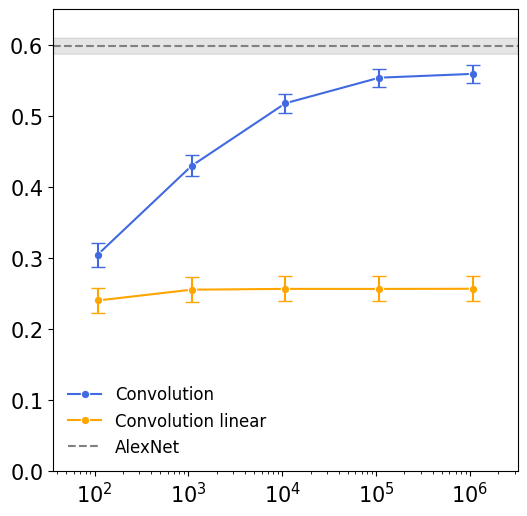

In [69]:
# main results
rcParams['figure.figsize'] = (6,6)  


# main plot
ax1 = sns.lineplot(data = df_engineered, x='features', y='score', hue='model', marker='o',palette = palette)
# adding error bars for the 95% confidence interval
for i in range(len(df_engineered)):
    plt.errorbar(df_engineered['features'][i], df_engineered['score'][i], 
                 yerr=[[df_engineered['score'][i] - df_engineered['lower'][i]], 
                       [df_engineered['upper'][i] - df_engineered['score'][i]]], 
                 fmt='none', capsize=5, color=df_engineered['color'][i])


# alexnet results
plt.axhline(y=df_alexnet['score'][0], color='gray', linestyle='--', label='AlexNet')
# adding confidence interval
plt.fill_between(np.arange(df_engineered['features'].min()/3,df_engineered['features'].max()*3), 
                 df_alexnet['lower'], 
                 df_alexnet['upper'], 
                 color='gray', alpha=0.2)


plt.ylim(0,0.45) if DATASET == 'naturalscenes' else plt.ylim(0,0.65)
plt.xlim(df_engineered['features'].min()/3,df_engineered['features'].max()*3)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")    
plt.xlabel('')
plt.ylabel('')    
ax1.legend(frameon=False,fontsize=12) if region == 'IT' else ax1.legend_.remove()
plt.savefig(f'figures/effects_of_regression_{DATASET}_{region}.png', dpi=200) 
plt.show()

# Fully random models

#### run bootstrap 

In [10]:
#dataset = 'naturalscenes'
dataset = 'majajhong'
info_dict = DATASET_INFO_DICT[dataset]


n_rows = info_dict['test_data_size']
all_sampled_indices = np.random.choice(n_rows, (1000, n_rows), replace=True) # Sample indices for all bootstraps at once

for region in info_dict['regions']:
    
    random_model = get_bootstrap_data(models= ['fully_random'],
                            features=info_dict['expansion_features'],
                            l1_random_filters=[30,300,3000],
                            dataset=dataset, 
                            subjects = info_dict['subjects'],
                            layers = 5,
                            file_name = 'random-model',
                            region=region,
                            all_sampled_indices=all_sampled_indices)

fully_random_30_features=3_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_30_features=3_layers=5_dataset=majajhong V4
fully_random_300_features=3_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_300_features=3_layers=5_dataset=majajhong V4
fully_random_3000_features=3_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_3000_features=3_layers=5_dataset=majajhong V4
fully_random_30_features=30_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_30_features=30_layers=5_dataset=majajhong V4
fully_random_300_features=30_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_300_features=30_layers=5_dataset=majajhong V4
fully_random_3000_features=30_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_3000_features=30_layers=5_dataset=majajhong V4
fully_random_30_features=300_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_30_features=300_layers=5_dataset=majajhong V4
fully_random_300_features=300_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_300_features=300_layers=5_dataset=majajhong V4
fully_random_3000_features=300_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_3000_features=300_layers=5_dataset=majajhong V4
fully_random_30_features=3000_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_30_features=3000_layers=5_dataset=majajhong V4
fully_random_300_features=3000_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_300_features=3000_layers=5_dataset=majajhong V4
fully_random_3000_features=3000_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_3000_features=3000_layers=5_dataset=majajhong V4
fully_random_30_features=30000_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_30_features=30000_layers=5_dataset=majajhong V4
fully_random_300_features=30000_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_300_features=30000_layers=5_dataset=majajhong V4
fully_random_3000_features=30000_layers=5_dataset=majajhong


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND fully_random_3000_features=30000_layers=5_dataset=majajhong V4
fully_random_30_features=3_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.17it/s]


fully_random_300_features=3_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.37it/s]


fully_random_3000_features=3_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.52it/s]


fully_random_30_features=30_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.52it/s]


fully_random_300_features=30_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.38it/s]


fully_random_3000_features=30_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


fully_random_30_features=300_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.49it/s]


fully_random_300_features=300_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.58it/s]


fully_random_3000_features=300_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.62it/s]


fully_random_30_features=3000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.39it/s]


fully_random_300_features=3000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.42it/s]


fully_random_3000_features=3000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.37it/s]


fully_random_30_features=30000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


fully_random_300_features=30000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.38it/s]


fully_random_3000_features=30000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


#### load bootstrap data

In [54]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

In [61]:
#load bootstrap data

with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-engineered-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_engineered = pickle.load(file)
    
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-random-model-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_random = pickle.load(file)  

with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-alexnet-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_alexnet = pickle.load(file)  

In [63]:
df_random['l1_random_filters'] = df_random['l1_random_filters'].apply(lambda x: str(x))
df_random['model'] = df_random['model'] + '_' + df_random['l1_random_filters']
df = pd.concat([df_engineered,df_random]).reset_index(drop=True)
df['features'] = df['features'].apply(lambda x: int(x)*36)


names ={'expansion':'EVC-like layer 1',
        'fully_random_30':'Fully random (filters = 30)',
        'fully_random_300':'Fully random (filters = 300)',
        'fully_random_3000':'Fully random (filters = 3000)'}


palette ={'EVC-like layer 1':'royalblue',
         'Fully random (filters = 30)':'plum',
         'Fully random (filters = 300)':'orchid',
         'Fully random (filters = 3000)':'darkviolet'}


df['model'] = df['model'].map(names)
df['color'] = df['model'].map(palette)

df = df.dropna(subset=['model']).reset_index(drop=True)

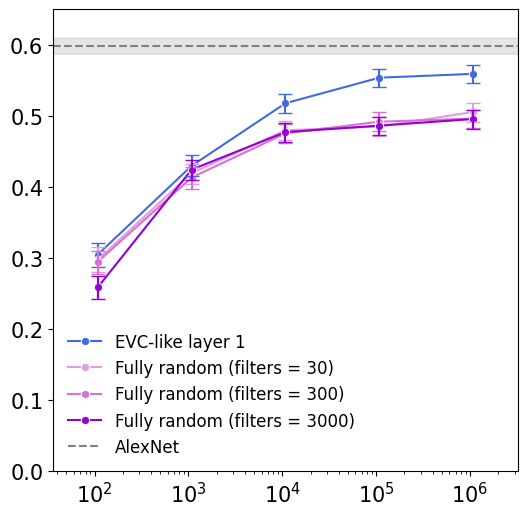

In [65]:
rcParams['figure.figsize'] = (6,6)  

# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='model', marker='o',palette = palette)
# Adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], 
                       [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])

# alexnet results
plt.axhline(y=df_alexnet['score'][0], color='gray', linestyle='--', label='AlexNet')
# adding confidence interval
plt.fill_between(np.arange(df['features'].min()/3,df['features'].max()*3), 
                 df_alexnet['lower'], df_alexnet['upper'], color='gray', alpha=0.2)


plt.xlabel('')
plt.ylabel('')
plt.ylim(0,0.45) if DATASET == 'naturalscenes' else plt.ylim(0,0.65)
plt.xlim(df['features'].min()/3,df['features'].max()*3)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")    
region == 'IT' if ax1.legend(frameon=False,fontsize=12) else ax1.legend_.remove()  
plt.savefig(f'figures/random_model_{DATASET}_{region}.png', dpi=200) 
plt.show()

# Shuffled pixel results

#### run bootstrap 

In [42]:
#dataset = 'naturalscenes'
dataset = 'majajhong'
info_dict = DATASET_INFO_DICT[dataset]
dataset  = dataset + '_shuffled'


n_rows = info_dict['test_data_size']
all_sampled_indices = np.random.choice(n_rows, (1000, n_rows), replace=True) # Sample indices for all bootstraps at once

for region in info_dict['regions']:
     
    # engineered models 
    get_bootstrap_data(models= ['expansion'],
                        features=info_dict['expansion_features'],
                        dataset=dataset, 
                        subjects=info_dict['subjects'],
                        layers = 5,
                        file_name = 'engineered',
                        region=region,
                        all_sampled_indices=all_sampled_indices)

expansion_features=3_layers=5_dataset=majajhong_shuffled


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3_layers=5_dataset=majajhong_shuffled V4
expansion_features=30_layers=5_dataset=majajhong_shuffled


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30_layers=5_dataset=majajhong_shuffled V4
expansion_features=300_layers=5_dataset=majajhong_shuffled


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=300_layers=5_dataset=majajhong_shuffled V4
expansion_features=3000_layers=5_dataset=majajhong_shuffled


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=3000_layers=5_dataset=majajhong_shuffled V4
expansion_features=30000_layers=5_dataset=majajhong_shuffled


  0%|                                           | 0/2 [00:00<?, ?it/s]


FILE NOT FOUND expansion_features=30000_layers=5_dataset=majajhong_shuffled V4
expansion_features=3_layers=5_dataset=majajhong_shuffled


100%|███████████████████████████████████| 2/2 [00:00<00:00,  7.90it/s]


expansion_features=30_layers=5_dataset=majajhong_shuffled


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.49it/s]


expansion_features=300_layers=5_dataset=majajhong_shuffled


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.51it/s]


expansion_features=3000_layers=5_dataset=majajhong_shuffled


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.45it/s]


expansion_features=30000_layers=5_dataset=majajhong_shuffled


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.48it/s]


#### load bootstrap data

In [43]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

In [47]:
# load bootstrap data

with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-expansion-{DATASET}_shuffled-{region}-df.pkl'), 'rb') as file:
    df_engineered_shuffled = pickle.load(file)
    
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-engineered-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_engineered = pickle.load(file)

with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-alexnet-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_alexnet = pickle.load(file)  

In [48]:
df_engineered['features'] = df_engineered['features'].apply(lambda x: int(x)*36)
df_engineered_shuffled['features'] = df_engineered_shuffled['features'].apply(lambda x: int(x)*36)

df_engineered['dataset'] = 'Normal images'
df_engineered_shuffled['dataset'] = 'Shuffled pixels'

df = pd.concat([df_engineered,df_engineered_shuffled])

names ={'expansion':'Expansion'}
palette ={'Normal images':'royalblue','Shuffled pixels':'indianred'}
df['model'] = df['model'].map(names)
df['color'] = df['dataset'].map(palette)

df = df.dropna(subset='model').reset_index()

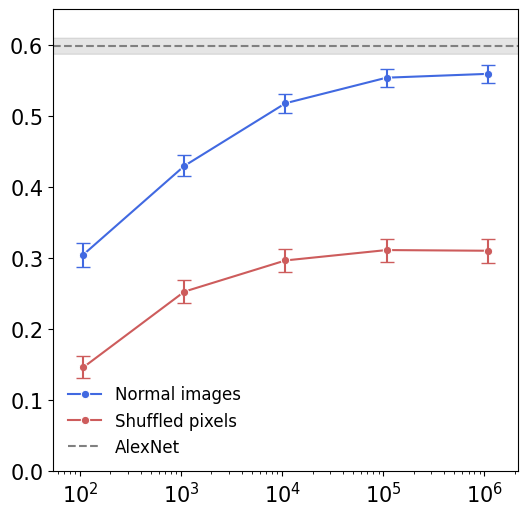

In [50]:
rcParams['figure.figsize'] = (6,6)  

# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='dataset', marker='o',palette = palette)
# adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])
    
# alexnet results
plt.axhline(y=df_alexnet['score'][0], color='gray', linestyle='--', label='AlexNet')
# adding confidence interval
plt.fill_between(np.arange(df['features'].min()/3,df['features'].max()*3), 
                 df_alexnet['lower'], df_alexnet['upper'], color='gray', alpha=0.2)



plt.xlim(df['features'].min()/2,df['features'].max()*2)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")        
plt.ylim(0,0.65) if region == 'IT' else plt.ylim(0,0.45)
ax1.legend(frameon=False,fontsize=12) if region == 'IT' else ax1.legend_.remove()
plt.xlabel('')
plt.ylabel('')
plt.savefig(f'figures/shuffled_pixels_{DATASET}_{region}.png', dpi=200) 
plt.show()

# Different non-linearities

#### run bootstrap 

In [4]:
#dataset = 'naturalscenes'
dataset = 'majajhong'
info_dict = DATASET_INFO_DICT[dataset]


n_rows = info_dict['test_data_size']
all_sampled_indices = np.random.choice(n_rows, (1000, n_rows), replace=True) # Sample indices for all bootstraps at once

for region in info_dict['regions']:
     
    # engineered models 
    get_bootstrap_data(models= ['expansion'],
                        features=[3000],
                        dataset=dataset, 
                        subjects=info_dict['subjects'],
                        nl_types=['relu','leaky_relu','gelu','elu','abs'],
                        layers = 5,
                        file_name = 'non-linearities',
                        region=region,
                        all_sampled_indices=all_sampled_indices)

expansion_features=3000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  7.77it/s]


expansion_features=3000_layers=5_dataset=majajhong_leaky_relu


100%|███████████████████████████████████| 2/2 [00:00<00:00, 10.18it/s]


expansion_features=3000_layers=5_dataset=majajhong_gelu


100%|███████████████████████████████████| 2/2 [00:00<00:00, 10.50it/s]


expansion_features=3000_layers=5_dataset=majajhong_elu


100%|███████████████████████████████████| 2/2 [00:00<00:00, 10.35it/s]


expansion_features=3000_layers=5_dataset=majajhong_abs


100%|███████████████████████████████████| 2/2 [00:00<00:00, 10.52it/s]


expansion_features=3000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.57it/s]


expansion_features=3000_layers=5_dataset=majajhong_leaky_relu


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.51it/s]


expansion_features=3000_layers=5_dataset=majajhong_gelu


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.41it/s]


expansion_features=3000_layers=5_dataset=majajhong_elu


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=3000_layers=5_dataset=majajhong_abs


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


#### load bootstrap data

In [6]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

In [7]:
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-non-linearities-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df = pickle.load(file)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


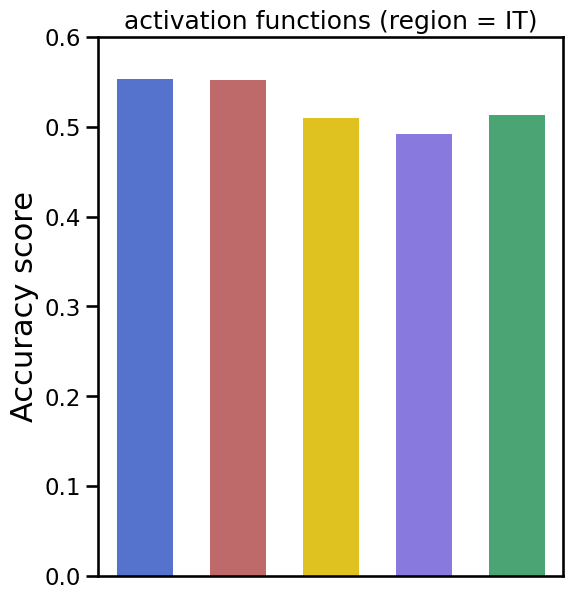

In [8]:
palette = {         
    'relu':'royalblue',
    'gelu':'gold',
    'leaky_relu':'indianred',
    'elu':'mediumslateblue',
    'abs':'mediumseagreen',
}

sns.set_context(context='talk')    
plt.rcParams['figure.figsize'] = (6,7)

ax1 = sns.barplot(x = df['nl_type'], 
                  y = df['score'], 
                       palette=palette,
                       width=0.6, 
                       dodge=False)            
    
ax1.legend().remove()
plt.xlabel('')
plt.ylim(0,0.6)
plt.ylabel(size=22, ylabel='Accuracy score')    
plt.xticks(size=14)
plt.title('activation functions (region = IT)')
ax1.set_xticks([])
plt.savefig(f'figures/no_labels_nls_{DATASET}_{region}.png', bbox_inches='tight', dpi=300)

# Different initializations

#### run bootstrap 

In [23]:
#dataset = 'naturalscenes'
dataset = 'majajhong'
info_dict = DATASET_INFO_DICT[dataset]


n_rows = info_dict['test_data_size']
all_sampled_indices = np.random.choice(n_rows, (1000, n_rows), replace=True) # Sample indices for all bootstraps at once

for region in info_dict['regions']:
     
    # engineered models 
    get_bootstrap_data(models= ['expansion'],
                        features=[3,30,300,3000,30000],
                        dataset=dataset, 
                        subjects=info_dict['subjects'],
                        init_types=['kaiming_uniform','kaiming_normal','orthogonal',
                                    'xavier_uniform','xavier_normal','uniform','normal'],
                        layers = 5,
                        file_name = 'init-type',
                        region='IT',
                        all_sampled_indices=all_sampled_indices)

expansion_features=3_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.31it/s]


expansion_features=3_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.49it/s]


expansion_features=3_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.61it/s]


expansion_features=3_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=3_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


expansion_features=3_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


expansion_features=3_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.63it/s]


expansion_features=30_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.62it/s]


expansion_features=30_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.58it/s]


expansion_features=30_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=30_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=30_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.56it/s]


expansion_features=30_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=30_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=300_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


expansion_features=300_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.50it/s]


expansion_features=300_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.41it/s]


expansion_features=300_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.41it/s]


expansion_features=300_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.39it/s]


expansion_features=300_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


expansion_features=300_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.62it/s]


expansion_features=3000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


expansion_features=3000_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


expansion_features=3000_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=3000_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=3000_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


expansion_features=3000_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.51it/s]


expansion_features=3000_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.37it/s]


expansion_features=30000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.50it/s]


expansion_features=30000_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.45it/s]


expansion_features=30000_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=30000_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.61it/s]


expansion_features=30000_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.53it/s]


expansion_features=30000_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.40it/s]


expansion_features=30000_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.36it/s]


expansion_features=3_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.49it/s]


expansion_features=3_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.37it/s]


expansion_features=3_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=3_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=3_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=3_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.63it/s]


expansion_features=3_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.63it/s]


expansion_features=30_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.56it/s]


expansion_features=30_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.48it/s]


expansion_features=30_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.61it/s]


expansion_features=30_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.58it/s]


expansion_features=30_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=30_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.31it/s]


expansion_features=30_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=300_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


expansion_features=300_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.51it/s]


expansion_features=300_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=300_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.43it/s]


expansion_features=300_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.57it/s]


expansion_features=300_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=300_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.56it/s]


expansion_features=3000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.59it/s]


expansion_features=3000_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


expansion_features=3000_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.66it/s]


expansion_features=3000_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=3000_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.61it/s]


expansion_features=3000_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.64it/s]


expansion_features=3000_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.63it/s]


expansion_features=30000_layers=5_dataset=majajhong


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.56it/s]


expansion_features=30000_layers=5_dataset=majajhong_kaiming_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


expansion_features=30000_layers=5_dataset=majajhong_orthogonal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.63it/s]


expansion_features=30000_layers=5_dataset=majajhong_xavier_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


expansion_features=30000_layers=5_dataset=majajhong_xavier_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.54it/s]


expansion_features=30000_layers=5_dataset=majajhong_uniform


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.60it/s]


expansion_features=30000_layers=5_dataset=majajhong_normal


100%|███████████████████████████████████| 2/2 [00:00<00:00,  8.55it/s]


#### load bootstrap data

In [30]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

In [31]:
with open(os.path.join(PATH_TO_BOOTSTRAP,f'bootstrap-results-init-type-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df = pickle.load(file)

In [32]:
palette = {         
    'kaiming uniform':'royalblue',
    'normal':'gold',
    'kaiming normal':'indianred',
    'xavier uniform':'mediumslateblue',
    'orthogonal':'mediumseagreen',
    'uniform':'pink',
    'xavier normal':'purple'
}

df['features'] = df['features'].apply(lambda x: int(x))
df['init_type'] = df['init_type'].apply(lambda x: x.replace('_',' '))
df['color'] = df['init_type'].map(palette)

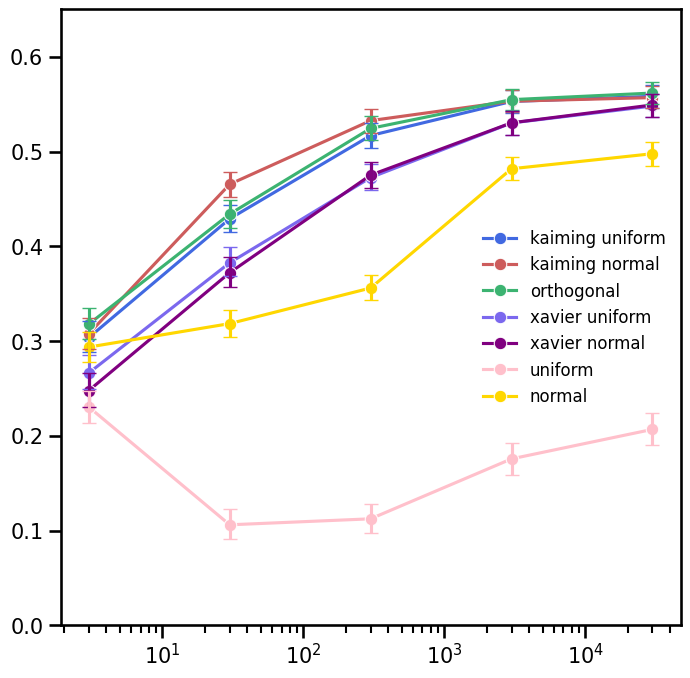

In [34]:
# main results
rcParams['figure.figsize'] = (8,8)  

# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='init_type', marker='o',palette = palette)

# adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], 
                       [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])


plt.xlabel('')
plt.ylabel('')
plt.ylim(0,0.65)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")    
ax1.legend(frameon=False,fontsize=12)
plt.savefig(f'init_{DATASET}_{region}.png', dpi=200) 
plt.show()